/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


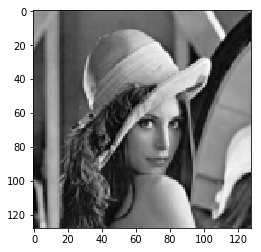

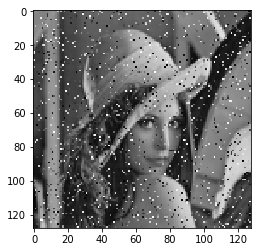

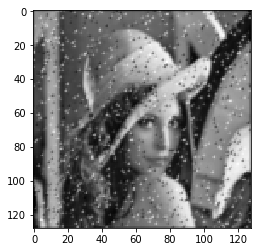

99.5955810546875


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy
import scipy.misc

def read_image(name):
    image = scipy.misc.imread(name,flatten=True)
    image = scipy.misc.imresize(image,(128,128),'bilinear')
    return image
    
def show_image(image):
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(image, noise_percent):
    rows=image.shape[0]    
    cols=image.shape[1]    
    area=rows*cols
    loc_flip=np.random.randint(0,area,int(area*noise_percent))
    mean = 0
    variance = 100
    gauss = np.random.normal(mean,variance,area)
    for ii in loc_flip:
        locr=int(ii/cols)
        locc=(ii%cols)
        image[locr,locc]=image[locr,locc] + int(gauss[ii])
        if image[locr,locc] < 0:
            image[locr,locc] = 0
        if image[locr,locc] > 255:
            image[locr, locc] = 255
    return image

def ICM(noisy_image):
    h = 1.0
    beta = 1.0
    eta = 2.1
    image1 = noisy_image
    for row in range(image1.shape[0]):
        for col in range(image1.shape[1]):
            image1[row,col] = min_energy(noisy_image, image1, row, col, h, beta, eta)
    return image1
            

def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def MSE(denoised_image, image):
    mse = ((denoised_image - image)**2).mean(axis=None)
    return mse


if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image1=read_image(name)
    image2=read_image(name)
    show_image(image1)
    noisy_image=add_noise(image1,noise_percent=0.10)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    mse = MSE(denoised_image,image2)
    show_image(denoised_image)
    print(mse)

In [ ]:
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
        if row > 1:
            pixel += 2*beta*image[row-2,col]
        if col > 1:
            pixel += 2*beta*image[row-1,col-1]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

def min_energy(noisy_image,image,row,col,h,beta,eta):
    sub_pixel = 2*eta*noisy_image[row,col]
    main_pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        if row > 1:
            sub_pixel += 2*beta*image[row-2,col]
        if col > 1:
            sub_pixel += 2*beta*image[row-1,col-1]
        if col < image.shape[1]-1:
            sub_pixel += 2*beta*image[row-1,col+1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col > 0:
        if col > 1:
            sub_pixel += 2*beta*image[row, col-2]
        if row > 1:
            sub_pixel += 2*beta*image[row-1, col]
        if row < image.shape[0]-1:
            sub_pixel += 2*beta*image[row+1, col-1]
        sub_pixel = int(sub_pixel/(2*h+2*beta*3+2*eta))
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = int(pixel/(2*h+2*beta*4+2*eta))
    if pixel > 255:
        pixel = 255
    return pixel

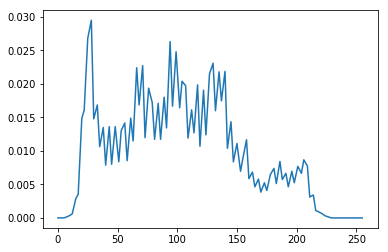

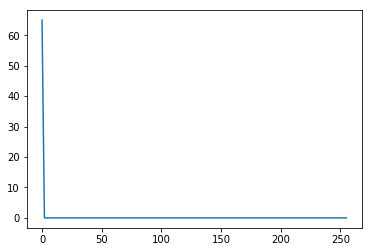

'\n# Plot histograms and gaussian curves\nfig, ax = plt.subplots()\nax.hist(image2.ravel(),255,[2,256], normed=True)\nax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")\n\nax.set_ylabel("Frequency")\nax.set_xlabel("Pixel Intensity")\n\nplt.legend()\n\nplt.show()\n'

In [14]:
import plotly.plotly as py
import plotly.tools as tls
import operator
from sklearn.mixture import GaussianMixture
import numpy as np

#print(min(image2.flatten()), np.max(image2.flatten()))
histo = np.histogram(image2.flatten(), range=(0, 255), bins = 100)

#histo0 = np.concatenate(([0], histo[0]), axis=0)

prob_x_ij = histo0/np.sum(histo0)
pixel_values = histo[1].astype(int)
plt.plot(pixel_values, prob_x_ij)
plt.show()

gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(prob_x_ij,1))


# Evaluate GMM
gmm_x = pixel_values
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))
plt.plot(gmm_x,gmm_y)
plt.show()


"""
# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(image2.ravel(),255,[2,256], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()
"""

#print(sum(pixel_values*prob_x_ij))

#plt.figure()
#plt.scatter(pixel_values, prob_x_ij)

#n, bins, patches = plt.hist(image2.flatten(), range=(0,255), bins = 255, density = True,facecolor='g', alpha=0.75)



#data = np.array(prob_x_ij).reshape(-1,1)
#clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
#h = clf.fit(data)

#x = np.array(pixel_values).reshape(-1,1)
#y = clf.score_samples(x)

#plt.plot(x,h)
#plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


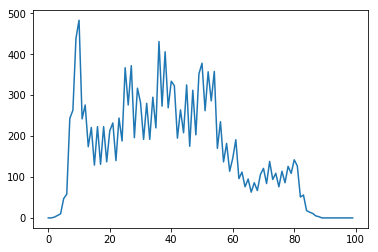

<Figure size 432x288 with 0 Axes>

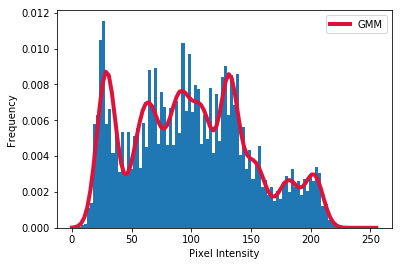

1.000000000000001


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

hist = cv2.calcHist([image2],[0],None,[100],[0,255])
plt.plot(hist)
plt.show
plt.figure()
#hist[0] = 0     # Removes background pixels

data = image2.ravel()
#data = data[data != 0]
#data = data[data != 1]  #Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components = 8)
gmm = gmm.fit(X=np.expand_dims(data,1))

# Evaluate GMM
gmm_x = np.linspace(0,255,100)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))


# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(image2.ravel(), 100,[0,255], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()
gmm_y = gmm_y/sum(gmm_y)
print(sum(gmm_y))

In [11]:

count = 0
for i in np.arange(256):
    for j in np.arange(256):
        for k in data[1:len(data)]:
            if data[k] == i && data[k] == data[k-1]:
                count += 1
    

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24